In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data

city = pd.read_csv(city_data)
ride = pd.read_csv(ride_data)

# Combine the data into a single dataset

merged_df = pd.merge(city,ride, on="city")

# Display the data table for preview

merged_df

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


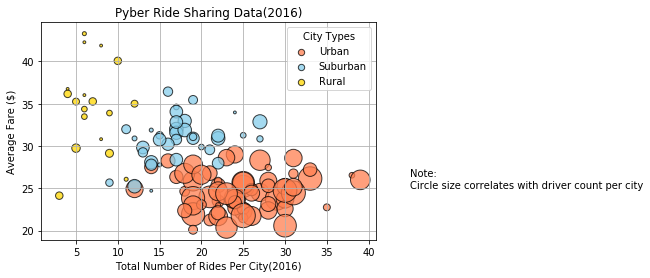

In [2]:
#Creating bubble plot
#Building data frames by city type, then sorting by city
urban = merged_df[merged_df["type"]=="Urban"]
urban_sorted = urban.groupby("city")
suburban = merged_df[merged_df["type"]=="Suburban"]
sub_sorted = suburban.groupby("city")
rural = merged_df[merged_df["type"]=="Rural"]
rural_sorted = rural.groupby("city")


#Calculations for urban, suburban and rural x and y coordinates + driver count average(to determine circle size)
urban_x = urban_sorted["ride_id"].count()
urban_y = urban_sorted["fare"].mean()
urban_driver = urban_sorted["driver_count"].mean()

sub_x = sub_sorted["ride_id"].count()
sub_y = sub_sorted["fare"].mean()
sub_driver = sub_sorted["driver_count"].mean()

rural_x = rural_sorted["ride_id"].count()
rural_y = rural_sorted["fare"].mean()
rural_driver = rural_sorted["driver_count"].mean()

#Building scatterplots for urban, suburban, and rural
plt.scatter(urban_x,urban_y, label="Urban", s=urban_driver*8,color="coral", alpha=.75, edgecolor="black", linewidths=1 )
plt.scatter(sub_x,sub_y, label="Suburban", s= sub_driver*8,color="skyblue", alpha=.75, edgecolor="black", linewidths=1)
plt.scatter(rural_x,rural_y, label="Rural", s=rural_driver*8,color="gold", alpha=.75, edgecolor="black", linewidths=1 )

#Making it pretty/informative
plt.grid()
plt.xlabel("Total Number of Rides Per City(2016)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data(2016)")
plt.text(45,25,"Note: \nCircle size correlates with driver count per city")

#Turning legend into variable so that markers can be adjusted 
legend = plt.legend(title="City Types",loc="best")
legend.legendHandles[0]._sizes = [40]
legend.legendHandles[1]._sizes = [40]
legend.legendHandles[2]._sizes = [40]

#Saving then showing figure
plt.savefig("Images/PyberBubblePlot")
plt.show()

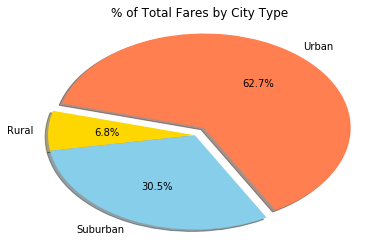

In [3]:
#"Total Fares By City Type" Pie Chart
#Calculating type percents
city_type = merged_df.groupby(["type"])
cityfare_total = city_type["fare"].sum()

#Building chart
labels = ["Rural","Suburban","Urban"]
explode = [0,0,0.1]
colors= ["gold","skyblue","coral"]
plt.pie(cityfare_total, labels=labels, explode=explode,colors=colors,autopct="%1.1f%%", shadow=True, startangle=165)
plt.title("% of Total Fares by City Type")
plt.axis('auto')

#Saving then showing figure
plt.savefig("Images/totalfaresbycitytypepiechart")
plt.show()


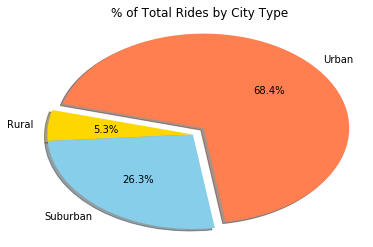

In [4]:
#"Total Rides By City Type" Pie Chart
#Calculating ride percents
ride_count = city_type['ride_id'].count()

#Building pie chart
labels = ["Rural","Suburban","Urban"]
explode = [0,0,0.1]
colors= ["gold","skyblue","coral"]
plt.pie(ride_count, labels=labels, explode=explode,colors=colors,autopct="%1.1f%%", shadow=True, startangle=165)
plt.title("% of Total Rides by City Type")
plt.axis('auto')

#Saving then showing figure
plt.savefig("Images/totalridesbycitytypepiechart")
plt.show()

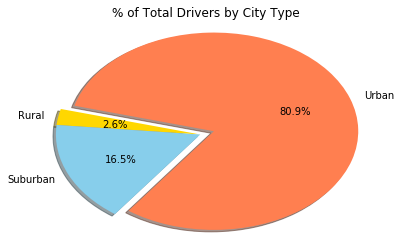

In [5]:
#"Total Drivers By City Type"Pie Chart
#Calculating total driver percentage
city_driver = city.groupby(["type"])
driver_count = city_driver["driver_count"].sum()

#Building pie chart
labels = ["Rural","Suburban","Urban"]
explode = [0,0,0.1]
colors= ["gold","skyblue","coral"]
plt.pie(driver_count, labels=labels, explode=explode,colors=colors,autopct="%1.1f%%", shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
plt.axis('auto')

#Saving then showing figure
plt.savefig("Images/totaldriversbycitytypepiechart")
plt.show()